## Farklı reklam kanallarında yapıan harcamaların satışlar üzerine etkisi

## Kütüphaneleri yükle 

In [23]:
import pandas as pd

# Veri Setini Yükle

In [24]:
ls

 Volume in drive C is Windows
 Volume Serial Number is 4821-D018

 Directory of C:\Users\emura\Documents\BTK24Nisan\GUN4

11.05.2024  12:31    <DIR>          .
11.05.2024  10:03    <DIR>          ..
11.05.2024  11:16    <DIR>          .ipynb_checkpoints
11.05.2024  11:03    <DIR>          __pycache__
19.02.2024  21:11             4.063 advertising.csv
11.05.2024  12:31            94.305 €oklu Do§rusal Regresyon (Multiple Linear Regression).ipynb
11.05.2024  11:01             1.201 file_to_speech.ipynb
11.05.2024  11:01               527 file_to_speech.py
11.05.2024  10:15            26.016 hi_accent.mp3
11.05.2024  11:11            69.984 Merha.mp3
11.05.2024  10:14            25.056 ses1.mp3
11.05.2024  10:44            13.138 Seslendirme.ipynb
11.05.2024  10:26               205 seslendirme_metni.txt
11.05.2024  11:12             6.680 seslendrme_denemesi.ipynb
              10 File(s)        241.175 bytes
               4 Dir(s)  11.872.698.368 bytes free


In [25]:
df=pd.read_csv("advertising.csv")

## EDA Keşifsel Veri Analizi (Exploratory Data Analysis)

In [26]:
df.head()

TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [28]:
df.describe().T

count      mean        std  min     25%     50%      75%    max
TV         200.0  147.0425  85.854236  0.7  74.375  149.75  218.825  296.4
Radio      200.0   23.2640  14.846809  0.0   9.975   22.90   36.525   49.6
Newspaper  200.0   30.5540  21.778621  0.3  12.750   25.75   45.100  114.0
Sales      200.0   14.0225   5.217457  1.6  10.375   12.90   17.400   27.0

In [6]:
# Korealasyon
df.corr()

TV     Radio  Newspaper     Sales
TV         1.000000  0.054809   0.056648  0.782224
Radio      0.054809  1.000000   0.354104  0.576223
Newspaper  0.056648  0.354104   1.000000  0.228299
Sales      0.782224  0.576223   0.228299  1.000000

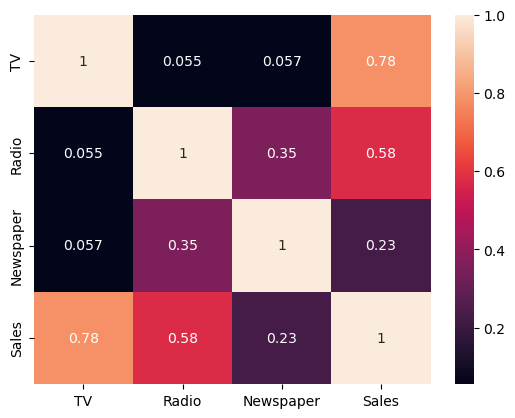

In [9]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True);

### Veri Önişleme

Veri önişleme aşaması
1. Eksik veriler ve dönüşümler yapılır 
2. X ve y belirlenir
3. Train ve test olarak ayrılır
4. Ölçeklendirme yapılır

In [12]:
# Regresyon kütüphaneleri sklearn
# Veri setini eğitim ve test olarak bölmek için gerekli modül
from sklearn.model_selection import train_test_split 
#regresyon modelini import et
from sklearn.linear_model import LinearRegression
#Modeli değerlendirmek için gerekli modüller
from sklearn.metrics import mean_squared_error, r2_score
#Ölçeklendirme için kullandığımız modül
from sklearn.preprocessing import StandardScaler as Scaler

In [13]:
# y tahmin edilecek değer
#X tahmin için kullanılacak özellikler
X=df.drop("Sales",axis=1) # Sonuç sütunu çıkar
y=df["Sales"]

In [14]:
# X ve y yi %20 test seti %80 eğitim olarak bölüyoruz
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

## Model Oluştur

In [15]:
#modeli tanımla
mlr=LinearRegression()

In [16]:
#Modeli fit et. eğit
mlr.fit(X_train,y_train) # eğitim setindeki X ler ve yler

LinearRegression()

In [17]:
#predict
y_pred=mlr.predict(X_test) # Tahminleri yap

In [18]:
y_pred

array([16.4080242 , 20.88988209, 21.55384318, 10.60850256, 22.11237326,
       13.10559172, 21.05719192,  7.46101034, 13.60634581, 15.15506967,
        9.04831992,  6.65328312, 14.34554487,  8.90349333,  9.68959028,
       12.16494386,  8.73628397, 16.26507258, 10.27759582, 18.83109103,
       19.56036653, 13.25103464, 12.33620695, 21.30695132,  7.82740305,
        5.80957448, 20.75753231, 11.98138077,  9.18349576,  8.5066991 ,
       12.46646769, 10.00337695, 21.3876709 , 12.24966368, 18.26661538,
       20.13766267, 14.05514005, 20.85411186, 11.0174441 ,  4.56899622])

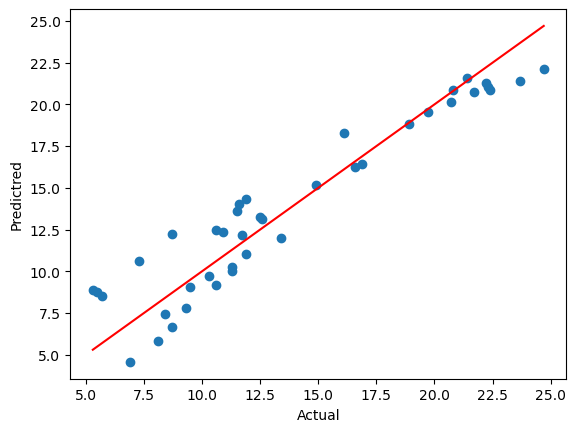

In [22]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predictred')
plt.plot([min(y_test),max(y_test)],[min(y_test),max(y_test)], color='red');

In [20]:
# Modeli değerlendir
r2_score(y_test,y_pred) # 0-1 arasında 1 e ne kadar yakında o kadar iyi

0.899438024100912

In [21]:
#RMSE hata kareler ortalaması kareköküü
mean_squared_error(y_test,y_pred)**0.5

1.7815996615334502

In [29]:
# Regresyon katsayıları
mlr.coef_

array([0.04472952, 0.18919505, 0.00276111])

In [30]:
# Regresyon sabiti
mlr.intercept_

2.9790673381226274

In [31]:
#Eğitim setini ölçeklendir
sc=Scaler()
X_train=sc.fit_transform(X_train)

In [32]:
#Modeli tekrar eğit
mlr.fit(X_train,y_train)

LinearRegression()

In [33]:
#Testi ölçeklendir
X_test=sc.transform(X_test)

In [36]:
X_test

array([[ 0.15781217,  0.59112727,  1.13227461],
       [ 0.53925283,  1.68199613,  1.13227461],
       [ 1.69783431,  0.36753303,  0.65380096],
       [-1.64363349,  0.95023317,  0.75245532],
       [ 0.83513672,  1.77007871, -1.31928629],
       [-0.89025846,  0.82149709,  1.12240918],
       [ 0.79354661,  1.42452397, -0.13543394],
       [-1.18851892, -0.76398933, -0.56951314],
       [ 0.86009078, -1.31958713, -0.8309472 ],
       [ 0.29803023, -0.02545078,  0.07667294],
       [-1.40835233,  0.11683646, -1.36861347],
       [-1.11484502, -1.16374872, -0.01211599],
       [ 1.00387371, -1.31958713,  2.70581169],
       [-1.71849568,  0.47594236, -1.01345777],
       [-0.12500054, -1.40766971, -0.16503025],
       [ 0.23980408, -1.02146148,  0.25918351],
       [-1.69591819,  0.35398186,  0.56501203],
       [ 0.56539519,  0.02875388, -0.7766873 ],
       [-0.88788188, -0.17451361,  0.12600012],
       [ 1.03833409,  0.31332837, -0.93453428],
       [ 0.94445928,  0.63855635,  2.182

In [34]:
#Tahminleri yap
y_pred=mlr.predict(X_test)

In [35]:
# değerlendirme
print ("R2 Score: ",r2_score(y_test,y_pred))

R2 Score:  0.899438024100912


In [38]:
mlr.coef_

array([3.76419618, 2.79230665, 0.05597551])

In [39]:
# 3. yol
X=sc.fit_transform(X)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [41]:
mlr.fit(X_train,y_train)

LinearRegression()

In [42]:
y_pred=mlr.predict(X_test)

In [43]:
r2_score(y_test,y_pred)

0.899438024100912

In [46]:
mean_squared_error(y_test,y_pred)**.5

1.78159966153345

In [44]:
mlr.coef_

array([3.83060599, 2.80191171, 0.05998274])

In [45]:
mlr.intercept_

14.042004239811021